### Test to text mining for Master thesis_Health Literacy
## Rita Ascenso

# carregar bibliotecas

In [5]:
!pip3 install nltk
!pip3 install matplotlib
!pip3 install pandas
!pip3 install sklearn
!pip3 install streamlit

In [11]:
#Instalar streamlit
import streamlit as st

# Instalar NLTK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle 
import nltk
import time
import os

from nltk.corpus import stopwords
from sklearn.datasets import load_files
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag

nltk.download("stopwords")
nltk.download("punkt")

#nltk.download()

#nltk.download('stopwords')

#nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ritaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Listar packages
#!pip list

In [19]:
uploaded_file = st.file_uploader("Escolha um arquivo TXT", type="txt")

if uploaded_file is not None:
    file_content = uploaded_file.read()
    file_content = file_content.decode('utf-8')
    st.write(f"Conteúdo do arquivo {uploaded_file.name}:")
    st.write(file_content)
if uploaded_file is not None:
    file_content = uploaded_file.read()
    file_content = file_content.decode('utf-8')
    st.write(f"Conteúdo do arquivo {uploaded_file.name}:")
    st.write(file_content)

    tokens = nltk.word_tokenize(file_content)
    words = [word.lower() for word in tokens if word.isalpha()]
    freq_dist = FreqDist(words)
    
    st.write("30 palavras mais frequentes:")
    for word, frequency in freq_dist.most_common(30):
        st.write(f"{word}: {frequency}")

2023-04-12 23:39:57.644 
  command:

    streamlit run C:\Users\ritaa\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


MANUAL Carregar ficheiro um a um Health.txt

In [12]:
#load/ import the dataset
#Health_original = pd.read_table("C:\\Users\\ritaa\\OneDrive\\Documentos\\Mestrado_estudante2210795\\MCD_TextMining\\Anaconda files\\Health.txt")
#Health_original = pd.read_txt("Health.txt")
#Health_original = np.genfromtxt("Health.txt",delimiter=None)
#Health_original = load_files('Healths_sa/')

#Health_original = pd.read_csv("Health.txt", sep=" ")  # display DataFrameprint(df)

#file = open('Health.txt',mode='r', encoding = 'utf-8')
file = open('1_Health.txt',mode='r', encoding = 'utf-8')
#file = open('2_Health.txt',mode='r', encoding = 'utf-8')
#file = open('3_Health.txt',mode='r', encoding = 'utf-8')
#file = open('4_Health.txt',mode='r', encoding = 'utf-8')
#file = open('5_Health.txt',mode='r', encoding = 'utf-8')
#file = open('6_Health.txt',mode='r', encoding = 'utf-8')
#file = open('7_Health.txt',mode='r', encoding = 'utf-8')
#file = open('8_Health.txt',mode='r', encoding = 'utf-8')
#file = open('9_Health.txt',mode='r', encoding = 'utf-8')
#file = open('10_Health.txt',mode='r', encoding = 'utf-8')
#file = open('11_Health.txt',mode='r', encoding = 'utf-8')
#file = open('12_Health.txt',mode='r', encoding = 'utf-8')
Health_original = file.read()
file.close()
#print(Health_original)


In [13]:
#remover referências [1digito ou mais] do corpus sample original - alterar para Healthcorpus
Health = re.sub('\(\d+\)','', Health_original)
Health1 = re.sub('\(\d\)','', Health)
Health2 = re.sub(r'[^\w\s]','', Health1)
Health3 = re.sub(r'^br$','', Health2)
Health4 = re.sub(r'^br$', ' ', Health3)
Health5 = re.sub(r'\s+br\s+',' ',Health4)
Health6 = re.sub(r'\s+[a-z]\s+', ' ',Health5)
Health7 = re.sub(r'^b\s+', '', Health6)
Health8 = text = re.sub(r'\bthe\b', '', Health7, flags=re.IGNORECASE)
Health9 = re.sub(r'\bdoi\b', '', Health8, flags=re.IGNORECASE)
Healthcorpus = re.sub(r'\s+', ' ', Health9)
#print (Healthcorpus)

Tratamento do corpus original

In [14]:
#listar todas as frases do corpus sample - alterar para Health
Health_sentences = nltk.sent_tokenize(Healthcorpus)

#print ("SENTENCES\n")
#print (Health_sentences)
#print ("\n")

#for sentence in Health_sentences:
#    print(sentence)

In [15]:
#separação de palavras de sentences - alterar para sentences_Health
tokenized_sentences = [nltk.word_tokenize(sentence) 
        for sentence in Health_sentences]
#print ('tokenized_sentences\n')
#print (tokenized_sentences)  
#print ("\n")
#for tokens_sentence in tokenized_sentences:
#    print(tokens_sentence)

In [16]:
#from nltk.tokenize import RegexpTokenizer applied to sentences - alterar para sentences_Health

tokenizer = RegexpTokenizer("[\w']+")
tokenized_sentences = []
for sentence in Health_sentences:
    tokens = tokenizer.tokenize(sentence)
    tokenized_sentences.append(tokens)
    
#print ('tokenized_sentences sem pontuação\n')
#print (tokenized_sentences)  
#print ("\n")
for tokens_sentence in tokenized_sentences:
    #print(tokens_sentence)
    print ("\n Tokens number:", len(tokens_sentence),"\n")


 Tokens number: 2770943 



In [17]:
# stopwords list
from nltk.corpus import stopwords

en_stopwords = sorted(set(stopwords.words('english')))
#print (en_stopwords)
#print ("\n size_en:", len(en_stopwords),"\n")

In [18]:
# filtering stopwords from corpus tokenized_sentences - alterar para tokens_Health

print("\n")
health_filter = [w for w in tokens_sentence if not w in en_stopwords]
#print ("words REMOVED stopwords")
#print (health_filter)
print ("\n Tokens number without stopwords:", len(health_filter),"\n")




 Tokens number without stopwords: 2138084 



In [11]:
#split
#fd_words = nltk.FreqDist(word.lower() for word in words)
fd_words = nltk.FreqDist(word.lower() 
                         for word in health_filter)
print(fd_words)


<FreqDist with 127841 samples and 2138084 outcomes>


In [12]:
fd_words = FreqDist(health_filter)

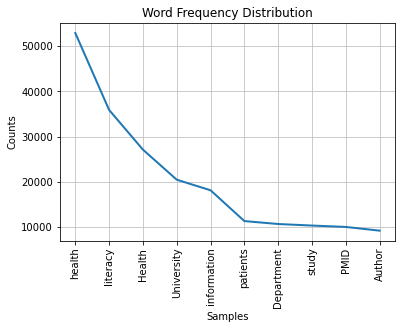

In [13]:
# Frequency Distribution Plot

#fd_words.plot(10,cumulative=False,title="Word Frequency Distribution")
#plt.show()

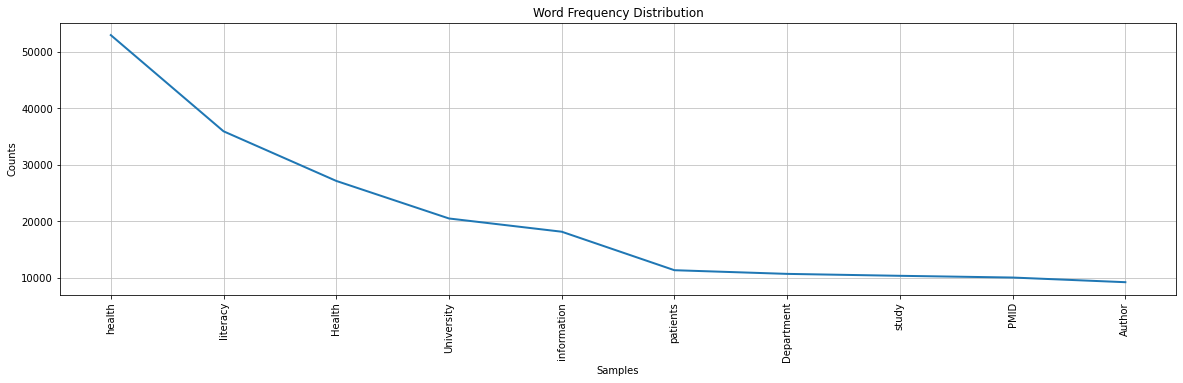

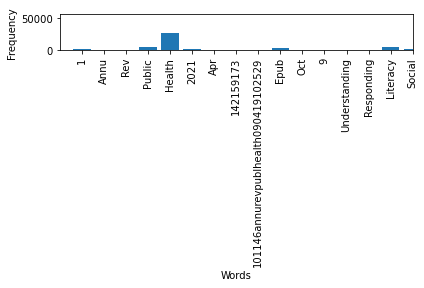

In [18]:
#plt.figure(figsize=(10, 5))
#fd_words.plot(10)

# Create bar plot
plt.figure(figsize=(20, 5))
fd_words.plot(10, title="Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.bar(fd_words.keys(), fd_words.values())
plt.xticks(rotation=90, fontsize=10)
plt.xlim(-1, 15)
plt.tight_layout()
#plt.show()

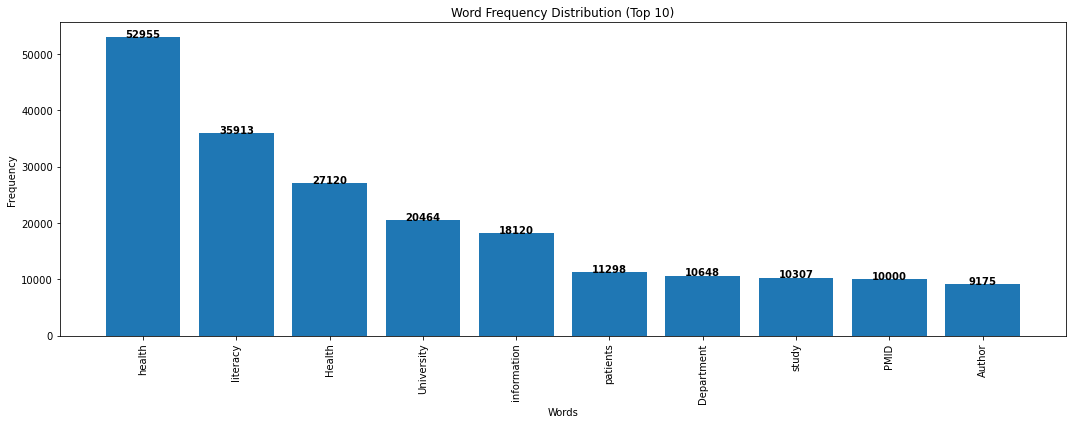

In [15]:
# Sort the FreqDist in descending order and take the top 10 items
top_words = fd_words.most_common(10)

# Create bar plot
plt.figure(figsize=(15, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])

# Add data labels
for i, v in enumerate([word[1] for word in top_words]):
    plt.text(i, v+1, str(v), ha='center', fontweight='bold')

# Customize plot
plt.title("Word Frequency Distribution (Top 10)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

## Counting

The count of words
The vocabulary (unique words)
The lexical diversity (the ratio of word count to vocabulary)

In [16]:
#health = nltk.corpus.reuters # Corpus of news articles? como ter um corpus Health.txt
counts  = nltk.FreqDist(word.lower() 
                         for word in health_filter)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print ("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))


Corpus has 127841 types and 2138084 tokens for a lexical diversity of 16.725


## POS tagging
Atribuição de uma categoria gramatical a cada palavra, usando para isso tags
(ver lista das POS taggers definidas na package NLTK)
NLTK usa um tuplo (token, tag)

In [17]:
# Example de identificação das tipologias POS - para aplicar a health_words
#tokenizer = RegexpTokenizer("[\w']+")
#health_words = tokenizer.tokenize(health_filter)
#print(health_words,"\n")
print ("\n health filter size_en:", len(health_filter),"\n")

#print ("\n health words size_en:", len(health_words),"\n")

pos_health = nltk.pos_tag(health_filter)
#print("POS: ", pos_health,"\n")
print ("\n pos_health size_en:", len(pos_health),"\n")

#FreqDist - ajuda na identificação de frequência
#depois pode usar-se para definir métricas


tag_fd = nltk.FreqDist(tag for (word,tag) in pos_health)
print(tag_fd.items(),"\n")
print(tag_fd.keys())
print ("\n pos_health tags size_en:", len(tag_fd),"\n")


 health filter size_en: 2138084 


 pos_health size_en: 2138084 

dict_items([('CD', 149814), ('NNP', 745816), ('NN', 460450), ('VBP', 43822), ('JJ', 217728), ('VBD', 74071), ('NNS', 198811), ('VBG', 53945), ('VBN', 34606), ('PRP', 5933), ('VBZ', 22703), ('IN', 26684), ('RB', 37346), ('VB', 15130), ('DT', 8951), ('FW', 6571), ('NNPS', 7473), ('JJR', 10124), ('MD', 6122), ('JJS', 2436), ('RBR', 2924), ('TO', 1940), ('CC', 1200), ('EX', 1289), ('PRP$', 952), ('$', 181), ('RP', 143), ('WP', 245), ('WRB', 313), ('POS', 96), ('WP$', 107), ('WDT', 20), ('RBS', 122), ('PDT', 12), ('UH', 4)]) 

dict_keys(['CD', 'NNP', 'NN', 'VBP', 'JJ', 'VBD', 'NNS', 'VBG', 'VBN', 'PRP', 'VBZ', 'IN', 'RB', 'VB', 'DT', 'FW', 'NNPS', 'JJR', 'MD', 'JJS', 'RBR', 'TO', 'CC', 'EX', 'PRP$', '$', 'RP', 'WP', 'WRB', 'POS', 'WP$', 'WDT', 'RBS', 'PDT', 'UH'])

 pos_health tags size_en: 35 

